In [35]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from pandas import DataFrame
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import time

In [4]:
df=pd.read_csv('F:\MSFE\IE517 MLF\HW6\ccdefault.csv')
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:

X, y = df.iloc[:, 1:24].values, df.iloc[:,24].values

SEED=1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=SEED)

rf=RandomForestClassifier(random_state=SEED)

print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


Using time: 15.62193169999955 s
CV accuracy scores_in-sample: [0.80703704 0.81592593 0.81259259 0.81148148 0.81962963 0.81222222
 0.81777778 0.82296296 0.81592593 0.82333333]
CV accuracy_in-sample mean+/-std :0.81589 +/- 0.00495
 1) PAY_0                          0.100747
 2) AGE                            0.067761
 3) BILL_AMT1                      0.060489
 4) LIMIT_BAL                      0.059069
 5) BILL_AMT2                      0.053355
 6) BILL_AMT3                      0.052139
 7) PAY_AMT1                       0.051323
 8) BILL_AMT6                      0.051196
 9) BILL_AMT4                      0.050156
10) BILL_AMT5                      0.049654
11) PAY_AMT2                       0.047285
12) PAY_AMT3                       0.046545
13) PAY_AMT6                       0.045843
14) PAY_AMT4                       0.044027
15) PAY_AMT5                       0.043409
16) PAY_2                          0.042763
17) PAY_3                          0.029492
18) PAY_4              

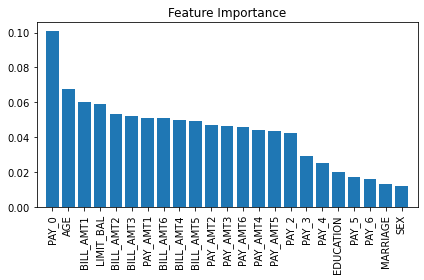

In [31]:
feat_labels=df.columns[1:]
start = time.perf_counter()
forest = RandomForestClassifier(n_estimators=50,random_state=1)
forest.fit(X_train,y_train)
scores1 = cross_val_score(estimator=forest, X=X_train, y=y_train, cv=10, n_jobs=-1)
end = time.perf_counter()
print ("Using time:",end-start,"s")
print('CV accuracy scores_in-sample: %s' % scores1)
print('CV accuracy_in-sample mean+/-std :%.5f +/- %.5f' % (np.mean(scores1),np.std(scores1)))
importances=forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1,30,
                           feat_labels[indices[f]],
                           importances[indices[f]]))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),
       importances[indices],
       align='center')
plt.xticks(range(X_train.shape[1]),
          feat_labels[indices], rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.show()

Using time: 29.30946589999985 s
CV accuracy scores_in-sample: [0.80851852 0.81444444 0.8137037  0.81148148 0.82148148 0.81037037
 0.81814815 0.82259259 0.81481481 0.82518519]
CV accuracy_in-sample mean+/-std :0.81607 +/- 0.00529
 1) PAY_0                          0.097879
 2) AGE                            0.067797
 3) BILL_AMT1                      0.061002
 4) LIMIT_BAL                      0.060085
 5) BILL_AMT2                      0.054591
 6) BILL_AMT3                      0.052198
 7) BILL_AMT6                      0.050540
 8) PAY_AMT1                       0.050393
 9) BILL_AMT4                      0.050123
10) BILL_AMT5                      0.049608
11) PAY_AMT2                       0.047952
12) PAY_2                          0.045952
13) PAY_AMT6                       0.045830
14) PAY_AMT3                       0.045733
15) PAY_AMT5                       0.043280
16) PAY_AMT4                       0.043221
17) PAY_3                          0.027745
18) PAY_4              

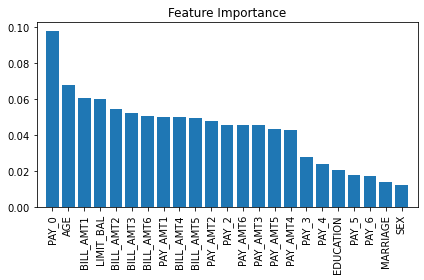

In [32]:
feat_labels=df.columns[1:]
start = time.perf_counter()
forest = RandomForestClassifier(n_estimators=100,random_state=1)
forest.fit(X_train,y_train)
scores1 = cross_val_score(estimator=forest, X=X_train, y=y_train, cv=10, n_jobs=-1)
end = time.perf_counter()
print ("Using time:",end-start,"s")
print('CV accuracy scores_in-sample: %s' % scores1)
print('CV accuracy_in-sample mean+/-std :%.5f +/- %.5f' % (np.mean(scores1),np.std(scores1)))
importances=forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1,30,
                           feat_labels[indices[f]],
                           importances[indices[f]]))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),
       importances[indices],
       align='center')
plt.xticks(range(X_train.shape[1]),
          feat_labels[indices], rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.show()

Using time: 55.15145990000019 s
CV accuracy scores_in-sample: [0.81037037 0.81925926 0.81185185 0.80666667 0.81925926 0.80777778
 0.81925926 0.82185185 0.81777778 0.82296296]
CV accuracy_in-sample mean+/-std :0.81570 +/- 0.00566
 1) PAY_0                          0.095263
 2) AGE                            0.067765
 3) BILL_AMT1                      0.060900
 4) LIMIT_BAL                      0.060055
 5) BILL_AMT2                      0.054563
 6) BILL_AMT3                      0.052115
 7) BILL_AMT6                      0.050414
 8) PAY_AMT1                       0.050305
 9) BILL_AMT4                      0.050253
10) BILL_AMT5                      0.049639
11) PAY_AMT2                       0.048203
12) PAY_2                          0.048059
13) PAY_AMT3                       0.046629
14) PAY_AMT6                       0.045892
15) PAY_AMT4                       0.043523
16) PAY_AMT5                       0.043482
17) PAY_3                          0.026382
18) PAY_4              

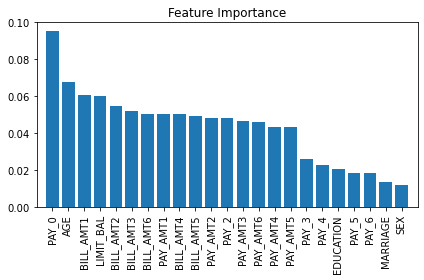

In [34]:
feat_labels=df.columns[1:]
start = time.perf_counter()
forest = RandomForestClassifier(n_estimators=200,random_state=1)
forest.fit(X_train,y_train)
scores1 = cross_val_score(estimator=forest, X=X_train, y=y_train, cv=10, n_jobs=-1)
end = time.perf_counter()
print ("Using time:",end-start,"s")
print('CV accuracy scores_in-sample: %s' % scores1)
print('CV accuracy_in-sample mean+/-std :%.5f +/- %.5f' % (np.mean(scores1),np.std(scores1)))
importances=forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1,30,
                           feat_labels[indices[f]],
                           importances[indices[f]]))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),
       importances[indices],
       align='center')
plt.xticks(range(X_train.shape[1]),
          feat_labels[indices], rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.show()

Using time: 83.78008959999897 s
CV accuracy scores_in-sample: [0.80925926 0.81888889 0.81111111 0.80814815 0.81888889 0.80814815
 0.81851852 0.82333333 0.81777778 0.8237037 ]
CV accuracy_in-sample mean+/-std :0.81578 +/- 0.00576
 1) PAY_0                          0.096258
 2) AGE                            0.067646
 3) BILL_AMT1                      0.060977
 4) LIMIT_BAL                      0.060011
 5) BILL_AMT2                      0.054560
 6) BILL_AMT3                      0.051900
 7) BILL_AMT4                      0.050468
 8) BILL_AMT6                      0.050442
 9) PAY_AMT1                       0.050084
10) BILL_AMT5                      0.049779
11) PAY_AMT2                       0.048212
12) PAY_AMT3                       0.046351
13) PAY_2                          0.046304
14) PAY_AMT6                       0.046095
15) PAY_AMT5                       0.043721
16) PAY_AMT4                       0.043456
17) PAY_3                          0.025878
18) PAY_4              

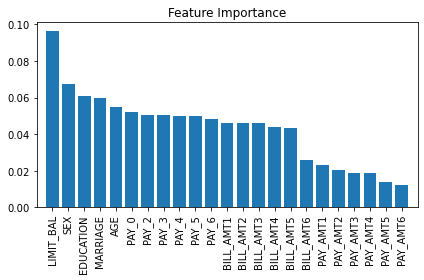

In [33]:
feat_labels=df.columns[1:]
start = time.perf_counter()
forest = RandomForestClassifier(n_estimators=300,random_state=1)
forest.fit(X_train,y_train)
scores1 = cross_val_score(estimator=forest, X=X_train, y=y_train, cv=10, n_jobs=-1)
end = time.perf_counter()
print ("Using time:",end-start,"s")
print('CV accuracy scores_in-sample: %s' % scores1)
print('CV accuracy_in-sample mean+/-std :%.5f +/- %.5f' % (np.mean(scores1),np.std(scores1)))
importances=forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1,30,
                           feat_labels[indices[f]],
                           importances[indices[f]]))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),
       importances[indices],
       align='center')
plt.xticks(range(X_train.shape[1]),
          feat_labels, rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.show()

In [25]:
params_rf = {
    'n_estimators':[50,100,200,300],
   
}

grid_rf= GridSearchCV(estimator=rf,
                      param_grid=params_rf,
                      cv=10,
                      scoring='accuracy',
                      n_jobs=-1
   
)

grid_rf.fit(X_train,y_train)
best_hyperparams = grid_rf.best_params_
print('Best hyperparams:\n',best_hyperparams )

Best hyperparams:
 {'n_estimators': 100}
